# comparison to bayes from ds from scratch
This gives 101 true positives (spam classified as “spam”), 33 false positives (ham classified
as “spam”), 704 true negatives (ham classified as “ham”), and 38 false negatives
(spam classified as “ham”). This means our precision is 101 / (101 + 33) = 75%, and
our recall is 101 / (101 + 38) = 73%, which are not bad numbers for such a simple
model.

The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”

In [1]:
import sys
sys.path.append('/Users/niarfe/tmprepos/theseus_node')
sys.path.append('/Users/niarfe/tmprepos/theseus_node/tests')
sys.path.append('/Users/niarfe/tmprepos/hydraseq')

import theseus
import os
import data
import hydraseq as hd

In [2]:
! ls ../tests/data/
spam     = data.load_per_line_file('../tests/data/spam.txt')
easy_ham = data.load_per_line_file('../tests/data/easy_ham.txt')
hard_ham = data.load_per_line_file('../tests/data/hard_ham.txt')
background = spam + easy_ham + hard_ham
print(len(spam), len(easy_ham), len(hard_ham), len(background))

background.txt easy_ham.txt   hard_ham.txt   spam.txt
498 2741 283 3522


In [3]:
n_background = theseus.Node(background)
n_spam       = theseus.Node(spam)
n_easy_ham   = theseus.Node(easy_ham)
n_hard_ham   = theseus.Node(hard_ham)
print('done')

done


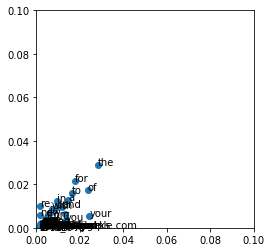

top spam:  ['rates', 'home', 'systemworks', 'money', 'insurance', 'year', 'here', 'clearance', 'need', 'best']
top easy:  ['o.t.', 'habeus', 'rh', 'sorting', 'silence', 'amendment', "hanson's", 'bad', 'recommended', '8']
top hard:  ['shopper)', '(cnet', 'tech', 'july', 'daily', 'windows', 'news.com:', 'daily]', 'dilbert', '[anchordesk]']
1	0	0	money
1	0	0	systemworks
1	0	0	rates
0	0	0	sale
1	0	0	year


In [4]:
n_spam.visualize(n_background, cutoff=100, magnification=20)

ratio = 0.1
f_spam = n_spam.create_profile(n_background, ratio=ratio)
f_easy = n_easy_ham.create_profile(n_background, ratio=ratio)
f_hard = n_hard_ham.create_profile(n_background, ratio=ratio)
# The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”
print("top spam: ", f_spam[:10])
print("top easy: ", f_easy[:10])
print("top hard: ", f_hard[:10])
for word in ['money', 'systemworks', 'rates', 'sale', 'year']:
    res = []
    for fil in [f_spam, f_easy, f_hard]:
        res.append("1" if word in fil else "0")
    res.append(word)
    print("\t".join(res))

In [5]:
print("starting")
cutoff =1
depth = 100
for target_filter, name in [(f_spam, "spam"), (f_hard, "hard"), (f_easy, "easy")]:
    print(name)
    sp, percsp = theseus.node.count_hits(spam,     target_filter, cutoff, depth)
    ha, percha = theseus.node.count_hits(hard_ham, target_filter, cutoff, depth)
    ea, percea = theseus.node.count_hits(easy_ham, target_filter, cutoff, depth)
    print(sp, percsp, ha, percha, ea, percea)
    print()


starting
spam


AttributeError: module 'theseus.node' has no attribute 'count_hits'

In [ ]:
%%time
# Populate the main hydra with EEEEEEverything!
hdr = hd.Hydraseq('')
print("total sentences ", len(background))
#[hdr.full_insert(sentence) for sentence in background]
hdr.full_self_insert_from(background)
len(hdr.columns)

In [ ]:
idx_elem = 10
sentence = " ".join(background[idx_elem])
print(sentence)
print('---------------------------------------------------')

print(hdr.to_hydra_rep(sentence))

def group_to_hydra_rep(group):
    return [hdr.to_hydra_rep(sentence) for sentence in group]

h_background =  group_to_hydra_rep(background)
h_spam =        group_to_hydra_rep(spam)
h_easy_ham =    group_to_hydra_rep(easy_ham)
h_hard_ham =    group_to_hydra_rep(hard_ham)
print(h_spam)

In [ ]:
n_h_background = theseus.Node(h_background)
n_h_spam = theseus.Node(h_spam)
n_h_easy_ham = theseus.Node(h_easy_ham)
n_h_hard_ham = theseus.Node(h_hard_ham)

In [ ]:
cutoff = 1
depth = 100
target = f_spam
theseus.node.count_hits(spam,     target, cutoff, depth)
theseus.node.count_hits(hard_ham, target, cutoff, depth)
theseus.node.count_hits(easy_ham, target, cutoff, depth);

In [ ]:
theseus.node.visualize(n_easy_ham, n_background, axis_lims=(0.0, 1.0), magnification=10.0)

In [ ]:

def get_spiral_dots(node1, node2, ratio):
    x, y, keys = theseus.node.create_xy_table(node1, node2, cutoff1=100, cutoff2=100, ratio=ratio)
    #print(len(x), len(y), len(keys))
    cles = []
    for row in zip(keys, zip(x, y)):
        if row[1][1] != 0:
            #print(row)
            cles.append(row[0])
        else:
            cles.append(row[0])
            #print("bad row ", row)
    return cles

ratio = 0.9
spam_list = get_spiral_dots(n_h_spam,     n_h_background, ratio)
easy_list = get_spiral_dots(n_h_easy_ham, n_h_background, ratio)
hard_list = get_spiral_dots(n_h_hard_ham, n_h_background, ratio)

def new_count_hits(group, lst, thold):
    """group list<list<str>> lst list, thold int"""
    hits = 0
    for sentence in group:
        score = len(set(sentence) & set(lst))
        if score > thold:
            hits += 1
    return hits

print("background", len(h_background))
print("totals ", len(h_spam), len(h_easy_ham), len(h_hard_ham))
thold = 4
target = spam_list
spamers  = new_count_hits(h_spam,     target, thold)
easyhams = new_count_hits(h_easy_ham, target, thold)
hardhams = new_count_hits(h_hard_ham, target, thold)
print("hits   ",spamers, easyhams, hardhams)